<h1><center>

![](https://i.imgur.com/jrRGMfx.png)

AI PRACTITIONER COURSE 

PRACTICE LAB - SESSION 2
LOGISTIC & SOFTMAX REGRESSION

**&copy; 2020 VTCA-COTAI. Internal Use Only.**

</center></h1>

In [ ]:
from google.colab import drive
# drive.mount('/content/drive')

# AGENDA


*   The difference between Logistic Regression and Softmax Regression
*   Train and evaluate a Logistic Regression Model using Keras
*   Train and evaluate a Softmax Regression Model using Keras



#Logistic Regression


**Linear Regression Recap**

$y = \theta_0 + \theta_1x_1 + \theta_2x_2 + ... + \theta_nx_n$
- $y$ is the output
- $\theta_0$ is the intercept (bias)
- $\theta_1$ is the coefficient (weight) for $x_1$ (the first feature)
- $\theta_n$ is the coefficient (weight) for $x_n$ (the nth feature)

**Logistic Regression**

$z = \theta_0 + \theta_1x_1 + \theta_2x_2 + ... + \theta_nx_n$

$y = \sigma(z)$

-   $\sigma$ is the activation function (**Sigmoid**, Tanh, ...)


**Sigmoid Activation**

$\sigma(z) = \frac{1}{1+e^{-z}}$


**Binary Cross-entropy Loss**

$J(\theta) = -\frac{1}{m}\sum_{i=1}^{m}(y_{i}\log(\hat{y}_{i}) + (1-y_{i})\log(1-\hat{y}_{i})$
-    log(z) $=$ ln(z)


# Keras

**Main Components**

*   **Model**


```
from tensorflow.keras.models import Sequential
```


*   **Layer**


```
from tensorflow.keras.layers import Dense, Activation, ...
```


*   **Optimizer**

```
from tensorflow.keras.optimizers import Adam, SGD, ...
```
*   **Loss function & Metrics**

```
model.compile(loss='mse', metrics=['mae','mse'], ...)
model.compile(loss='binary_crossentropy', metrics='accuracy', ...)
model.compile(loss='categorical_crossentropy', metrics='accuracy', ...)
```

*   **Callbacks** (later)

# Exercise 1: A Simple Logistic Regression

## Load and Preprocess data



This dataset contains **2 features** 'Exam 1 Marks' and 'Exam 2 Marks' and the label 0 or 1 (pass or fail). 

Your job is define and train a Logistic Regression Model to predict the probability of passing or failure for future exams. 

(Input the marks of 2 exams return if this student pass or fail)

In [ ]:
import numpy as np 
import pandas as pd

def create_dataset():
  np.random.seed(42)
  x_1 = np.random.randint(10, 101, size=100)
  x_2 = np.random.randint(10, 101, size=100)
  y = []
  for i,j in zip(x_1, x_2):
    if i >= 50 and j >= 50:
      y.append(1)
    elif i + j >= 120:
      y.append(1)
    else:
      y.append(0)
  y = np.array(y)

  data = pd.DataFrame(columns=['x_1', 'x_2', 'y'])
  data['x_1'] = x_1
  data['x_2'] = x_2
  data['y'] = y
  return data

In [ ]:
# TODO:
# 1. call create_dataset() 
# 2. Print out the first 5 rows 
data = create_dataset()
data.head()

,x_1,x_2,y
0,61,74,1
1,24,98,1
2,81,80,1
3,70,18,0
4,30,97,1


Check if our data contains NULL value using info() function from pandas

In [ ]:
# print out the datatype and check null
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   x_1     100 non-null    int64
 1   x_2     100 non-null    int64
 2   y       100 non-null    int64
dtypes: int64(3)
memory usage: 2.5 KB


Get ``X`` and ``y`` from dataframe

In [ ]:
# TODO
# 1. From the dataframe, get X and y
# 2. Print out the shape of X and y
X = data[['x_1', 'x_2']].values.copy()
y = data['y'].values.copy()
print('Shape of X', X.shape)
print('Shape of y', y.shape)


Shape of X (100, 2)
Shape of y (100,)


Alternative ways to get ``X`` and ``y``
```
X=data.iloc[:,:2].values
y=data.iloc[:,-1].values
```

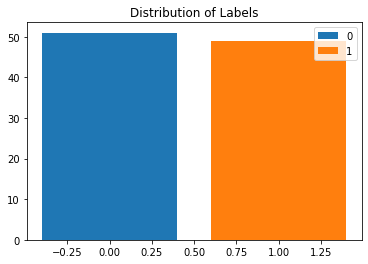

In [ ]:
import matplotlib.pyplot as plt # for drawing chart

# draw the distribution of data
# np.where(condition) return all indices matched the condition
# np.where(condition, value if true, value if false) replace all values 
# matched the condition
plt.bar(0,len(np.where(y==0)[0]))
plt.bar(1,len(np.where(y==1)[0]))
plt.title('Distribution of Labels')
plt.legend([0,1])
plt.show()

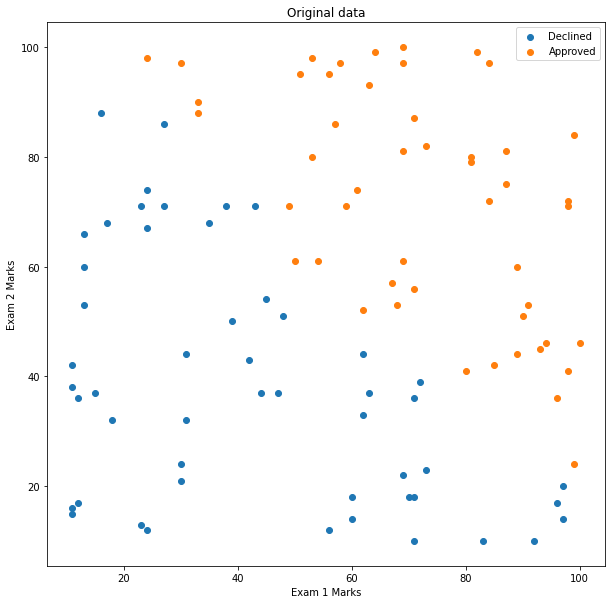

In [ ]:
# plot the original dataset
plt.figure(figsize=(10,10))
plt.scatter(X[np.where(y==0),0], X[np.where(y==0),1])
plt.scatter(X[np.where(y==1),0], X[np.where(y==1),1])
plt.legend(['Declined','Approved'])
plt.title('Original data')
plt.xlabel('Exam 1 Marks')
plt.ylabel('Exam 2 Marks')
plt.show()

In [ ]:
# TODO:
# 1. import train_test_split from sklearn
# 2. split data to 80% train and 20% test, random_state=42
# 3. print out the shape of train and test set
#### YOUR CODE HERE *****
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, shuffle=True,test_size=0.2,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler # standardize

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Define and train Keras Model

In [ ]:
from tensorflow.keras.models import Sequential # a simple model Class in Keras
from tensorflow.keras.layers import Dense, Activation # layers Class in keras
from tensorflow.keras.optimizers import SGD # Search algorithm

# define Logistic Regression model using Sequential
model = Sequential()
# input_shape = number of features of X
model.add(Dense(1, input_shape=(X_train.shape[1:])))
model.add(Activation('sigmoid'))


In [ ]:
# print out the summary of model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
_________________________________________________________________
activation (Activation)      (None, 1)                 0         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


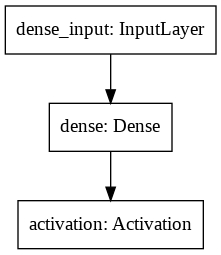

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, 'model.png')

In [ ]:
# compile model using binary_crossentropy loss with adam optimizer and using 
# accuracy for performance measure
model.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')
history = model.fit(X_train, y_train, epochs=1000) 

Epoch 1/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.5239 - accuracy: 0.7125
Epoch 2/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.5229 - accuracy: 0.7125
Epoch 3/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.5220 - accuracy: 0.7250
Epoch 4/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.5211 - accuracy: 0.7250
Epoch 5/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.5201 - accuracy: 0.7250
Epoch 6/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.5191 - accuracy: 0.7250
Epoch 7/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.5182 - accuracy: 0.7250
Epoch 8/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.5173 - accuracy: 0.7375
Epoch 9/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.5164 - accuracy: 0.7375
Epoch 10/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.5155 - accuracy: 0.7375
Epoch 11/1000
3/3 [

## Evaluate Model Performance

In [ ]:
# evaluate model performance on test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 2ms/step - loss: 0.5440 - accuracy: 0.7000


[0.5439697504043579, 0.699999988079071]

In [ ]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(2, 1) dtype=float32, numpy=
 array([[1.0479492 ],
        [0.04395758]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([-0.08083539], dtype=float32)>]

In [ ]:
weights = model.get_weights()[0]
bias = model.get_weights()[1]
print('Weights:', np.squeeze(weights))
print('Bias:',np.squeeze(bias))

Weights: [1.0479492  0.04395758]
Bias: -0.08083539


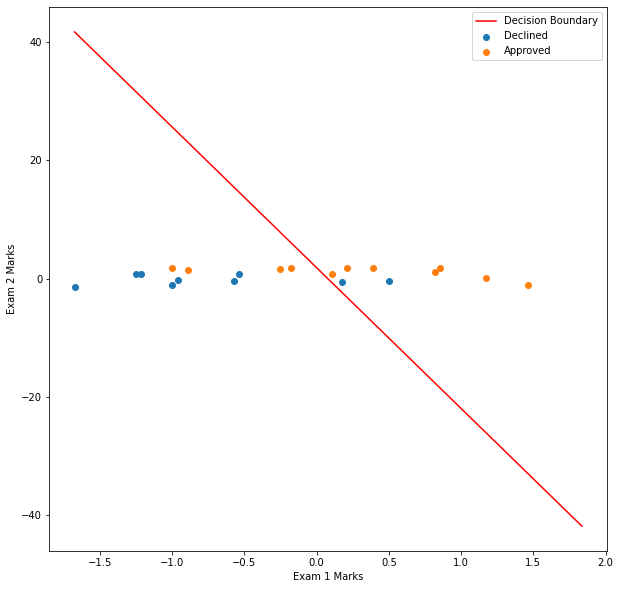

In [ ]:
decision_x = [np.min(X_test[:,0]), np.max(X_test[:,1])]
decision_y = - (bias + np.dot(np.expand_dims(decision_x, axis=1), weights[0])) / weights[1]
plt.figure(figsize=(10,10))
plt.scatter(X_test[np.where(y_test==0),0], X_test[np.where(y_test==0),1])
plt.scatter(X_test[np.where(y_test==1),0], X_test[np.where(y_test==1),1])
plt.plot(decision_x, decision_y, c='red')
plt.legend(['Decision Boundary','Declined','Approved'])
plt.xlabel('Exam 1 Marks')
plt.ylabel('Exam 2 Marks')
plt.show()

# **Softmax Regression**

**Softmax Regression**

$z = \theta_0 + \theta_1x_1 + \theta_2x_2 + ... + \theta_nx_n$

$y = \sigma(z)$

-   $\sigma$ is the **Softmax** activation

**Softmax Activation**

$\sigma(z) = \frac{exp(z_{i})}{\sum_{i=1}^{C}exp(z_{i})}$
-   exp(z) $= e^z$
-   C: Number of classes


In [ ]:
%reset -f

# Excercise 2: Digits classification

## Load and preprocess Mnist Digits Dataset

In [ ]:
import numpy as np
from tensorflow.random import set_seed
np.random.seed(42)

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

def load_data():
  (X_train, y_train), (X_test, y_test) = mnist.load_data()
  X_train = np.expand_dims(X_train, axis=-1) # from shape 28x28 to 28x28x1
  X_test = np.expand_dims(X_test, axis=-1) # from shape 28x28 to 28x28x1
# TODO:
# 1. Scale X_train, X_test to [0,1]
# 2. One hot encoding y_train, y_test using to_categorical() function
###### YOUR CODE HERE *****  
  

In [ ]:
X_train, y_train, X_test, y_test = load_data()
print('Shape of X train:', X_train.shape)
print('Shape of y train:', y_train.shape)
print('Shape of X test:', X_test.shape)
print('Shape of y test:', y_test.shape)

In [ ]:
# PLOT SOME IMAGES
import matplotlib.pyplot as plt

fig, axs = plt.subplots(10,10)
fig.set_figheight(15)
fig.set_figwidth(15)
for i in range(10):
  for j in range(10):
    target = np.random.choice(np.where(np.argmax(y_train, axis=1) == i)[0])
    axs[i][j].grid('off')
    axs[i][j].axis('off')
    axs[i][j].imshow(np.squeeze(X_train[target]), cmap='gray')
    #axs[i][j].set_title('Number:',j)

## Define Softmax Regression Model using Keras

The pre_defined_model() function will return a Deep CNN Model.
This model will transform input image to a new X' (called embedding vector)


In [ ]:
from tensorflow.keras.layers import Conv2D, Flatten, MaxPool2D, Dense
from tensorflow.keras.models import Sequential

def create_feature_extraction_model(input_shape):
  model = Sequential()
  model.add(Conv2D(32,(3,3), padding='same', activation='relu', input_shape=input_shape))
  model.add(Conv2D(32,(3,3), padding='same', activation='relu'))
  model.add(MaxPool2D())
  model.add(Conv2D(64,(3,3), padding='same', activation='relu'))
  model.add(Conv2D(64,(3,3), padding='same', activation='relu'))
  model.add(MaxPool2D())
  model.add(Flatten())
  model.add(Dense(1024, activation='relu'))
  return model

In [ ]:
# TODO:
# 1. Call create_feature_extraction_model() to create model
# 1. Add a softmax layer to model
# 2. print out model using summary() function


## Train

In [ ]:
#TODO:
#1. compile model using loss='categorical_crossentropy', optimizer='adam', metrics='accuracy)
#2. Fit model on X_train, y_train and 5 epochs

## Evaluate

In [ ]:
# TODO:
#1. Evaluate model on test set

In [ ]:
# TODO
# 1. Make a prediction on Test Set

In [ ]:
fig, axs = plt.subplots(10,10)
fig.set_figheight(3 * 10 - 1)
fig.set_figwidth(2 * 10 - 1)
for i in range(10):
  for j in range(10):
    target = np.random.choice(np.where(np.argmax(y_test, axis=1) == i)[0])
    axs[i][j].grid('off')
    axs[i][j].axis('off')    
    pred = model.predict(np.expand_dims(X_test[target], axis=0))
    axs[i][j].imshow(np.squeeze(X_test[target]))
    axs[i][j].set_title("pred: {}\ntrue: {}\nscore: {:.3}".format(
              np.argmax(pred), np.argmax(y_test[target]), np.max(pred)
    ))
   